In [1]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
w = torch.tensor(3.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

In [3]:
def forward(x):
    y = w*x + b
    return y

In [4]:
x = torch.tensor(2)
forward(x)

tensor(7., grad_fn=<AddBackward0>)

In [5]:
x = torch.tensor([[4],[7]])
forward(x)

tensor([[13.],
        [22.]], grad_fn=<AddBackward0>)

In [6]:
torch.manual_seed(1)
model = nn.Linear(in_features = 1, out_features = 1)

print(model.bias, model.weight)

Parameter containing:
tensor([-0.4414], requires_grad=True) Parameter containing:
tensor([[0.5153]], requires_grad=True)


In [7]:
x = torch.tensor([2.0])
model(x)

tensor([0.5891], grad_fn=<AddBackward0>)

In [8]:
0.5153*x + (-0.4414)

tensor([0.5892])

In [9]:
x = torch.tensor([[2.0], [3.3]])
model(x)

tensor([[0.5891],
        [1.2590]], grad_fn=<AddmmBackward0>)

----

In [10]:
class LR(nn.Module):

    def __init__(self, input_size , output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):

        pred = self.linear(x)
        return pred

In [11]:
torch.manual_seed(1)
model = LR(1,1)
model

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [12]:
for name,param in model.named_parameters():
    print(name, "\t", param.item())

linear.weight 	 0.5152631998062134
linear.bias 	 -0.44137823581695557


In [13]:
x = torch.tensor([[1.0],[2.0]])
model.forward(x)

tensor([[0.0739],
        [0.5891]], grad_fn=<AddmmBackward0>)

---

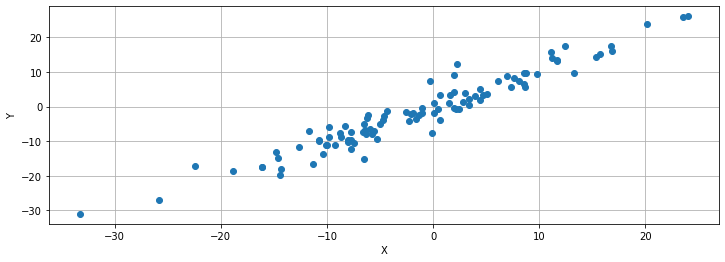

In [14]:
X = torch.randn(100,1)*10
y = X + 3*torch.randn(100,1)

plt.figure(figsize = (12,4))
plt.plot(X.numpy(), y.numpy(), "o")
plt.ylabel("Y")
plt.xlabel("X")
plt.grid(True)
plt.show()

In [15]:
torch.manual_seed(1)
model = LR(1,1)
model

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [16]:
[w,b] = model.parameters()
print(w,b)

w1 = w[0][0].item()
b1 = b[0].item()
print("----")
print(w1,b1)

Parameter containing:
tensor([[0.5153]], requires_grad=True) Parameter containing:
tensor([-0.4414], requires_grad=True)
----
0.5152631998062134 -0.44137823581695557


In [17]:
def get_params():
    return (w[0][0].item(), b[0].item())

In [18]:
X.max(),X.min()

(tensor(24.0698), tensor(-33.3115))

In [19]:
def plot_fit(titles):
    
    w1, b1 = get_params()
    x1 = np.array([-30,30]) #Min and Max Noktalar
    y1 = w1*x1 + b1
    
    plt.figure(figsize = (12,5))
    plt.plot(x1, y1, "r")
    plt.scatter(X,y)
    plt.title(titles)
    plt.grid(True)
    plt.show()

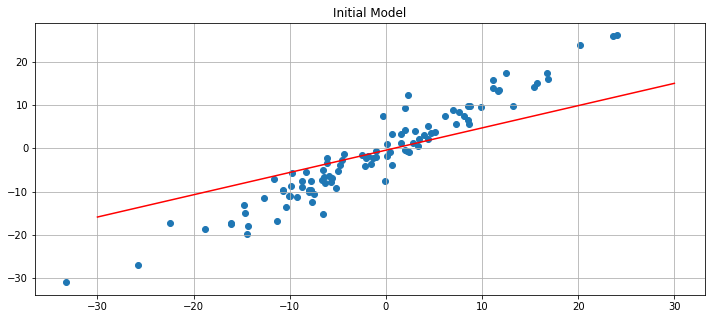

In [20]:
plot_fit("Initial Model")

---

In [21]:
for name,param in model.named_parameters():
    print(name, "\t", param.item())

linear.weight 	 0.5152631998062134
linear.bias 	 -0.44137823581695557


In [22]:
torch.manual_seed(1)
model = LR(1,1)

[w,b] = model.parameters()

X = torch.randn(100,1)*10
y = X + 3*torch.randn(100,1)

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

In [23]:
epochs = 100
losses = []
for i in range(epochs):

    y_pred = model.forward(X)
    loss = criterion(y_pred, y)

    print("Epoch : ", i+1 , "Loss : ", loss.item())

    losses.append(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch :  1 Loss :  36.448326110839844
Epoch :  2 Loss :  25.847070693969727
Epoch :  3 Loss :  19.274921417236328
Epoch :  4 Loss :  15.200486183166504
Epoch :  5 Loss :  12.674422264099121
Epoch :  6 Loss :  11.10822868347168
Epoch :  7 Loss :  10.137072563171387
Epoch :  8 Loss :  9.534791946411133
Epoch :  9 Loss :  9.161184310913086
Epoch :  10 Loss :  8.92933464050293
Epoch :  11 Loss :  8.785365104675293
Epoch :  12 Loss :  8.69587516784668
Epoch :  13 Loss :  8.640159606933594
Epoch :  14 Loss :  8.605380058288574
Epoch :  15 Loss :  8.583581924438477
Epoch :  16 Loss :  8.569831848144531
Epoch :  17 Loss :  8.56106948852539
Epoch :  18 Loss :  8.555403709411621
Epoch :  19 Loss :  8.551656723022461
Epoch :  20 Loss :  8.549099922180176
Epoch :  21 Loss :  8.547282218933105
Epoch :  22 Loss :  8.545924186706543
Epoch :  23 Loss :  8.544849395751953
Epoch :  24 Loss :  8.543954849243164
Epoch :  25 Loss :  8.543170928955078
Epoch :  26 Loss :  8.54245662689209
Epoch :  27 Loss : 

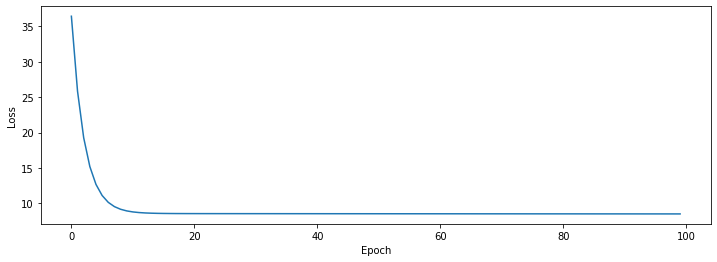

In [24]:
plt.figure(figsize= (12,4))
plt.plot(range(epochs), losses)
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

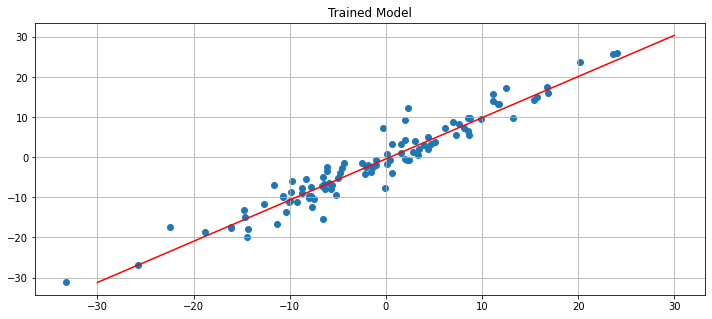

In [25]:
plot_fit("Trained Model")